<a href="https://colab.research.google.com/github/GekaTimof/AndroidStudioProjects/blob/main/%D0%9F%D0%B0%D1%80c%D0%B8%D0%BD%D0%B3_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install bs4
!pip install requests
!pip install transliterate
!pip install requests beautifulsoup4 pandas


In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


In [33]:
url = 'https://genshin-info.ru/wiki/personazhi/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html')

cards = soup.find_all('div', {'class':'itemList__item'})

characters = []
for card in cards:
    name = card.find('div', {'class':'itemcard__imgName'}).text

    elem = card.find('div', {'class':'itemcard__element'})
    elem = elem.get('class', [])[1][1:]

    href = card.find('a', {'title':name})
    href = href.get('href', [])

    response = requests.get(f'https://genshin-info.ru/{href}')
    html_ch = response.text

    soup_ch = BeautifulSoup(html_ch, 'html')

    ratings = {}
    rating_block = soup_ch.find('div', class_='characterDetail__rating')
    if rating_block:
        titles = rating_block.find_all('div', class_='characterDetail__ratingTitle')
        values = rating_block.find_all('div', class_='characterDetail__ratingItem')
        for t, v in zip(titles, values):
            title = t.get_text(strip=True)
            value = v.get_text(strip=True)
            ratings[title] = value
    else:
        ratings = {
            "Общий рейтинг": None,
            "Main DPS": None,
            "Sub DPS": None,
            "Support": None,
            "Мир": None
        }

    # Пример: добавить к персонажу
    character = {
        'name': name,
        'elem': elem,
        'Общий рейтинг': None if ratings.get('Общий рейтинг') == "-" else ratings.get('Общий рейтинг'),
        'Main DPS': None if ratings.get('Main DPS') == "-" else ratings.get('Main DPS'),
        'Sub DPS': None if ratings.get('Sub DPS') == "-" else ratings.get('Sub DPS'),
        'Support': None if ratings.get('Support') == "-" else ratings.get('Support'),
        'Мир': None if ratings.get('Мир') == "-" else ratings.get('Мир')
    }
    characters.append(character)
    print(character)


{'name': 'Эскофье', 'elem': 'cryo', 'Общий рейтинг': None, 'Main DPS': None, 'Sub DPS': None, 'Support': None, 'Мир': None}
{'name': 'Ифа', 'elem': 'anemo', 'Общий рейтинг': None, 'Main DPS': None, 'Sub DPS': None, 'Support': None, 'Мир': None}
{'name': 'Вареса', 'elem': 'electro', 'Общий рейтинг': 'S', 'Main DPS': 'S', 'Sub DPS': None, 'Support': None, 'Мир': 'S+'}
{'name': 'Иансан', 'elem': 'electro', 'Общий рейтинг': 'S+', 'Main DPS': None, 'Sub DPS': None, 'Support': 'S+', 'Мир': 'S'}
{'name': 'Мидзуки', 'elem': 'anemo', 'Общий рейтинг': 'B', 'Main DPS': 'B', 'Sub DPS': None, 'Support': 'B', 'Мир': 'S'}
{'name': 'Лань Янь', 'elem': 'anemo', 'Общий рейтинг': 'S', 'Main DPS': None, 'Sub DPS': None, 'Support': 'S', 'Мир': 'A'}
{'name': 'Мавуика', 'elem': 'pyro', 'Общий рейтинг': 'S+', 'Main DPS': 'S+', 'Sub DPS': 'S+', 'Support': None, 'Мир': 'S+'}
{'name': 'Ситлали', 'elem': 'cryo', 'Общий рейтинг': 'S+', 'Main DPS': None, 'Sub DPS': None, 'Support': 'S+', 'Мир': 'S'}
{'name': 'Путеш

In [34]:
df = pd.DataFrame(characters)
df.to_csv('genshin_characters_stats.csv', index=False, encoding='utf-8-sig')
df.head()

,name,elem,Общий рейтинг,Main DPS,Sub DPS,Support,Мир
0,Эскофье,cryo,None,None,None,None,None
1,Ифа,anemo,None,None,None,None,None
2,Вареса,electro,S,S,None,None,S+
3,Иансан,electro,S+,None,None,S+,S
4,Мидзуки,anemo,B,B,None,B,S


In [45]:
from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('genshin_characters_stats.csv')

<ipython-input-47-0f3168d6a22d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='elem', palette='Set2')


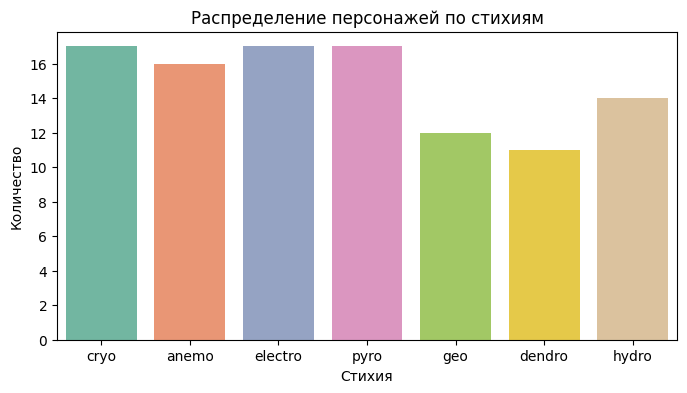

interactive(children=(SelectMultiple(description='Персонажи', index=(0, 1), options=('Эскофье', 'Ифа', 'Вареса…

<function __main__.compare_characters(chars)>

In [47]:
rating_map = {'S+': 6, 'S': 5, 'A': 4, 'B': 3, 'C': 2, 'D': 1, None: 0}
for col in ['Общий рейтинг', 'Main DPS', 'Sub DPS', 'Support', 'Мир']:
    df[col + '_num'] = df[col].map(rating_map)

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='elem', palette='Set2')
plt.title('Распределение персонажей по стихиям')
plt.xlabel('Стихия')
plt.ylabel('Количество')
plt.show()


def compare_characters(chars):
    if isinstance(chars, str):
        chars = [chars]
    subset = df[df['name'].isin(chars)]
    ratings = ['Общий рейтинг_num', 'Main DPS_num', 'Sub DPS_num', 'Support_num', 'Мир_num']
    subset = subset.set_index('name')
    subset = subset[ratings].rename(columns={
        'Общий рейтинг_num':'Общий', 'Main DPS_num':'Main DPS',
        'Sub DPS_num':'Sub DPS', 'Support_num':'Support', 'Мир_num':'Мир'
    })
    subset.T.plot(kind='bar', figsize=(10,5), colormap='coolwarm')
    plt.title('Сравнение выбранных персонажей по ролям')
    plt.ylabel('Рейтинг (S+=6, S=5, ..., D=1)')
    plt.xlabel('Роль')
    plt.legend(title='Персонаж')
    plt.show()


char_options = df['name'].unique().tolist()
interact(compare_characters, chars=widgets.SelectMultiple(
    options=char_options,
    value=[char_options[0], char_options[1]],
    description='Персонажи'
))